# Random Forest Modeling

Previously, we found that Random Forest produced the highest F1 score compared to using a single decision tree, logistic regression, and support vector machine. Let's tune the random forest model.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import math
from scipy import stats

import itertools
#import plot_confusion_matrix_copy.py
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV


In [3]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [4]:
# read in cleaned data
data = pd.read_csv('model_data1.csv')

In [5]:
# Isolate Dependent Variable
well = data['status_group']

In [6]:
# Isolate Independent Variable
predictors = data.drop(['status_group', 'id'], axis=1)

In [8]:
# Split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(predictors, well, test_size = 0.25, random_state = 0)

# Tuning - manually try parameters

How does the f1 score change as we tune "n_estimators", or in other words, increase the number of trees in the forest?

In [10]:
clf3 = RandomForestClassifier(n_estimators=40)
clf3 = clf3.fit(x_train, y_train)
y_pred5 = clf3.predict(x_test)

In [11]:
# Accuracy
accuracy_score(y_test, y_pred5)

0.79551084753396895

In [13]:
# f1 score
f1_score(y_test, y_pred5, average='weighted')

0.78814727226315673

Confusion matrix, without normalization
[[6442  199  645]
 [ 514  312  163]
 [1128   75 3843]]


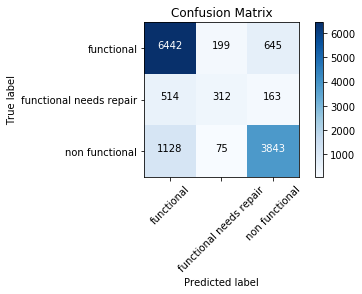

In [14]:
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, y_pred5), 
                      classes=['functional', 'functional needs repair', 'non functional'],
                      normalize=False,
                      title = 'Confusion Matrix')

Normalized confusion matrix
[[ 0.88416141  0.02731265  0.08852594]
 [ 0.51971689  0.31547017  0.16481294]
 [ 0.2235434   0.01486326  0.76159334]]


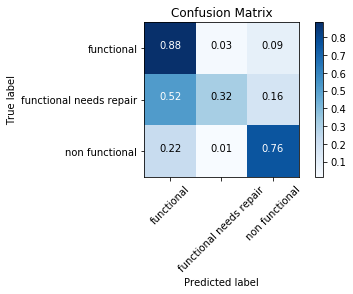

In [12]:
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, y_pred5), 
                      classes=['functional', 'functional needs repair', 'non functional'],
                      normalize=True,
                      title = 'Confusion Matrix')

Compared with a random forest where the number of trees is 10, changing the number of trees to 40 does not increase the recall for each class by much.

In [15]:
# What if we do not put a limit on max_features and greatly increase the number of trees? 
clf5 = RandomForestClassifier(n_estimators=500, max_features=None) # max features set to sqrt(164 features)
clf5 = clf5.fit(x_train, y_train)

y_pred7 = clf5.predict(x_test)

In [16]:
accuracy_score(y_test, y_pred7)

0.79611140304781924

In [17]:
f1_score(y_test, y_pred7, average='weighted')

0.78928133973563686

The f1 score is increased only slightly.

Confusion matrix, without normalization
[[6428  194  664]
 [ 508  327  154]
 [1113   83 3850]]


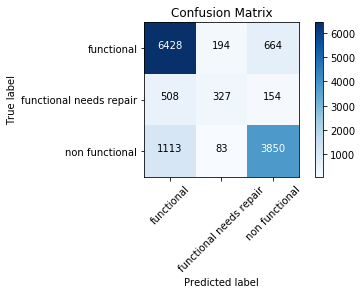

In [18]:
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, y_pred7), 
                      classes=['functional', 'functional needs repair', 'non functional'],
                      normalize=False,
                      title = 'Confusion Matrix')

Normalized confusion matrix
[[ 0.88223991  0.02662641  0.09113368]
 [ 0.51365015  0.33063701  0.15571284]
 [ 0.22057075  0.01644867  0.76298058]]


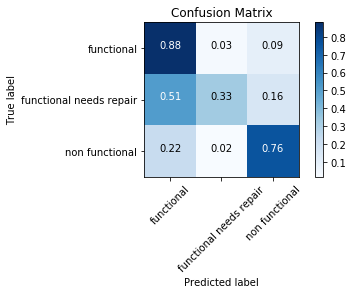

In [19]:
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, y_pred7), 
                      classes=['functional', 'functional needs repair', 'non functional'],
                      normalize=True,
                      title = 'Confusion Matrix')

# Grid Search

In [21]:
clf2 = RandomForestClassifier()

In [ ]:
parameters = {"max_depth": [2,4,6,8,10,15,20], 
              "n_estimators": [10, 20, 30, 40, 50],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6, 10], 
              "max_features": [10, 13, 20, 30, 40, 50]}

In [ ]:
rf_gridcv = GridSearchCV(estimator=clf2, param_grid=parameters, n_jobs=1, cv = 10, 
                         verbose=100)

In [ ]:
rfgridfit = rf_gridcv.fit(x_train, y_train)

In [ ]:
rfgridfit.best_score_ 
# Best score was 0.80440440440440442

In [ ]:
bestfit = rfgridfit.best_estimator_
# The paramaters that enabled the best score were:
# max depth = 20
# max features = 30, 
# min samples leaf = 2
# min samples split = 2
# n estimators = 50

What if we allowed for higher numbers for max depth?

In [22]:
parameters2 = {"max_depth": [30, 40, 50, 75, 100],
               "n_estimators": [164],
               "min_samples_leaf": [2],
               "max_features": [30]}

In [ ]:
rf_gridcv2 = GridSearchCV(estimator=clf2, param_grid=parameters2, n_jobs=1, cv = 5, 
                         verbose=100)

In [ ]:
rfgridfit2 = rf_gridcv2.fit(x_train, y_train)

In [ ]:
rfgridfit2.best_score_
# 0.80505505505505504

In [ ]:
rfgridfit2.best_params_
# 'max_depth': 40,
# 'max_features': 30,
# 'min_samples_leaf': 2,
# 'n_estimators': 164

# The best max_depth is 40.

Try higher numbers for n_estimators:

In [23]:
parameters3 = {"max_depth": [40],
               "n_estimators": [60, 70, 80, 100, 120, 140],
               "min_samples_leaf": [2],
               "max_features": [30]}

In [ ]:
rf_gridcv3 = GridSearchCV(estimator=clf2, param_grid=parameters3, n_jobs=1, cv = 5, 
                         verbose=100)

In [ ]:
rfgridfit3 = rf_gridcv3.fit(x_train, y_train)

In [ ]:
rfgridfit3.best_score_
#0.8045545545545546

In [ ]:
rfgridfit3.best_params_
# 'max_depth': 40,
# 'max_features': 30,
# 'min_samples_leaf': 2,
# 'n_estimators': 140

Increasing n_estimators or max_depth did not increase the score by much.

Before tuning, we had an f1 score of 78% After tuning, we reached a score of 80.5%, just a small increase. So the default parameters for random forest worked very well.

Let's look at classification results with tuned parameters; however, we'll keep n_estimators as square root of the number of features, as generally recommended.

In [28]:
clf9 = RandomForestClassifier(max_depth=40, max_features=30, min_samples_leaf=2, n_estimators=140) # max features set to sqrt(164 features)
clf9 = clf9.fit(x_train, y_train)

In [29]:
y_pred9 = clf9.predict(x_test)

In [30]:
f1_score(y_test, y_pred9, average='weighted')

0.79274298597643955

Normalized confusion matrix
[[ 0.9007686   0.01811694  0.08111447]
 [ 0.53993933  0.29929221  0.16076845]
 [ 0.23186683  0.01010702  0.75802616]]


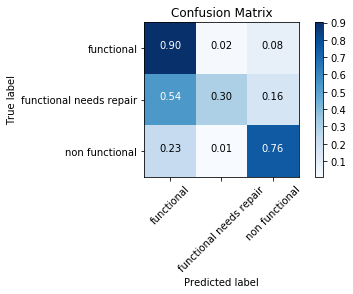

In [31]:
plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, y_pred9), 
                      classes=['functional', 'functional needs repair', 'non functional'],
                      normalize=True,
                      title = 'Confusion Matrix')